In [1]:
#Bibliotecas que voy a usar# 
import pandas as pd

In [2]:
#importar tabla 
#path = 'C:/Users/WINDOWS 8.1/Desktop/maca/trabajo_final_alga-aras/tabla_trabajo_final.csv' 
path = 'C:/Users/maca2/OneDrive/Documentos/Github/trabajo_final_alga-aras/tabla_trabajo_final.csv'
sparks_data_list= pd.read_csv(path,sep=',') #tabla incorporada como dataframe y el archivo original cada columna separada por coma
del sparks_data_list['Unnamed: 0'] #borrar la columna 0
sparks_data_list.head()#mstrar las primeras filas de la tabla

,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,11.242589,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0


### Registrar medidas caracteristicas

In [27]:
df=sparks_data_list
print(df)

      tiempo_maximo  intensidad_maxima  intensidad_minima  tiempo_valle   
0              13.0          10.925926           7.740741          23.0  \
1               4.0          10.941176           8.117647           7.0   
2               3.0           7.230769           6.884615           4.0   
3              15.0          10.363636           7.454545           0.0   
4              24.0          10.689655           7.931034          26.0   
...             ...                ...                ...           ...   
2392            9.0           5.241379           4.551724          13.0   
2393            8.0           5.526316           4.684211          10.0   
2394            3.0           5.700000           4.200000          10.0   
2395           18.0          29.888889          25.388889           2.0   
2396           22.0           6.268293           4.707317          23.0   

      intensidad_valle  sparks_amplitud   TTP  sparks_tiempo_pico50   
0             7.666667      

In [6]:
df.describe() # para obtenr medidas caracteristicas de cada ditribucion

,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2069.000000,2336.000000,2336.000000,2336.000000,2336.000000,2397.000000,2397.000000,2397.00000
mean,8.585616,16.546522,13.009426,10.145120,13.905734,0.307328,4.600599,7.418224,29.337625,3.433206,6.950771,0.090817,6.160103,14.815603,18.597413,1.53567
std,6.284302,15.008828,11.534076,6.351037,12.145036,0.803676,4.526220,21.870741,128.084665,21.580814,10.210784,0.107791,5.520145,6.206602,18.520580,0.49883
min,1.000000,2.636364,2.125000,0.000000,2.111111,-0.040698,1.000000,-47.481535,-4608.037502,-69.481535,-166.000000,-0.020349,-24.000000,4.000000,5.000000,1.00000
25%,4.000000,6.117647,5.482069,6.000000,5.571429,0.091938,1.000000,2.655810,8.907313,0.521316,3.000000,0.026786,3.000000,10.000000,11.000000,1.00000
50%,7.000000,7.732143,6.312500,9.000000,6.753378,0.154744,3.000000,5.372176,16.305071,1.379049,6.000000,0.056499,5.000000,14.000000,15.000000,2.00000
75%,12.000000,23.377404,18.333333,13.000000,19.620629,0.263229,7.000000,9.016228,32.808022,3.353218,9.000000,0.111471,9.000000,18.000000,20.000000,2.00000
max,48.000000,124.300000,98.600000,50.000000,98.666667,16.129630,43.000000,785.487402,1624.952729,783.487402,115.000000,1.008814,44.000000,56.000000,506.000000,2.00000


In [28]:
import numpy as np

#### Eliminar filas con más de 8 columnas NaN ###

# Obtener índices de filas con más de 8 columnas NaN
filas_eliminar = df[df.isnull().sum(axis=1) > 8].index

# Eliminar filas
df = df.drop(filas_eliminar)

# Imprimir filas eliminadas y valores de la última columna "flag"
print("Filas eliminadas:")
print(filas_eliminar)
print("\nValores de la última columna 'flag':")
print(df['flag'].values)

##### Separar en dos poblaciones y reemplazar valores NaN por la media ####
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Calcular medias de cada población
media_poblacion1 = poblacion1.mean()
media_poblacion2 = poblacion2.mean()

# Reemplazar valores NaN por la media de cada población
df.loc[df['flag'] == 1] = df.loc[df['flag'] == 1].fillna(media_poblacion1)
df.loc[df['flag'] == 2] = df.loc[df['flag'] == 2].fillna(media_poblacion2)


Filas eliminadas:
Index([  50,  112,  183,  213,  218,  247,  331,  339,  356,  422,  456,  487,
        488,  490,  497,  498,  512,  548,  551,  581,  605,  713,  845,  932,
        979,  980,  981, 1031, 1112, 1143, 1151, 1152, 1217, 1224, 1252, 1264,
       1391, 1404, 1424, 1435, 1437, 1485, 1506, 1615, 1689, 1700, 1712, 1850,
       1958, 1961, 1980, 2029, 2115, 2204, 2271, 2303, 2316, 2320, 2342, 2376,
       2380],
      dtype='int64')

Valores de la última columna 'flag':
[2. 2. 1. ... 1. 1. 2.]


In [29]:
print(len(filas_eliminar))

61


### Representar frecuencia de variable y distribucion

In [24]:
# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Inicializar el dataframe de resultados
resultados = pd.DataFrame(columns=['Columna', 'Mediana_1', 'Mediana_2', 'Moda_1', 'Moda_2', 'Percentil_25_1', 'Percentil_25_2',
                                   'Percentil_75_1', 'Percentil_75_2', 'Rango_1', 'Rango_2', 'Intercuartil_1', 'Intercuartil_2',
                                   'DesviacionMedia_1', 'DesviacionMedia_2', 'Varianza_1', 'Varianza_2', 'DesviacionTipica_1',
                                   'DesviacionTipica_2', 'CoeficienteVariacion_1', 'CoeficienteVariacion_2'])

# Paso 3: Calcular las estadísticas descriptivas para cada población de cada columna
for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"

    # Calcular estadísticas para la población 1
    mediana_1 = poblacion1[columna].median()
    moda_1 = poblacion1[columna].mode().values[0] if not poblacion1[columna].mode().empty else np.nan
    percentil_25_1 = poblacion1[columna].quantile(0.25)
    percentil_75_1 = poblacion1[columna].quantile(0.75)
    rango_1 = poblacion1[columna].max() - poblacion1[columna].min()
    intercuartil_1 = percentil_75_1 - percentil_25_1
    desviacion_media_1 = np.mean(np.abs(poblacion1[columna] - mediana_1))
    varianza_1 = poblacion1[columna].var()
    desviacion_tipica_1 = poblacion1[columna].std()
    coef_variacion_1 = desviacion_tipica_1 / mediana_1

    # Calcular estadísticas para la población 2
    mediana_2 = poblacion2[columna].median()
    moda_2 = poblacion2[columna].mode().values[0] if not poblacion2[columna].mode().empty else np.nan
    percentil_25_2 = poblacion2[columna].quantile(0.25)
    percentil_75_2 = poblacion2[columna].quantile(0.75)
    rango_2 = poblacion2[columna].max() - poblacion2[columna].min()
    intercuartil_2 = percentil_75_2 - percentil_25_2
    desviacion_media_2 = np.mean(np.abs(poblacion2[columna] - mediana_2))
    varianza_2 = poblacion2[columna].var()
    desviacion_tipica_2 = poblacion2[columna].std()
    coef_variacion_2 = desviacion_tipica_2 / mediana_2

    # Agregar las estadísticas al dataframe de resultados
    resultados.loc[len(resultados)] = [columna, mediana_1, mediana_2, moda_1, moda_2, percentil_25_1, percentil_25_2,
                                       percentil_75_1, percentil_75_2, rango_1, rango_2, intercuartil_1, intercuartil_2,
                                       desviacion_media_1, desviacion_media_2, varianza_1, varianza_2,
                                       desviacion_tipica_1, desviacion_tipica_2, coef_variacion_1, coef_variacion_2]

# Imprimir los resultados
print(resultados)


                 Columna  Mediana_1  Mediana_2     Moda_1     Moda_2   
0          tiempo_maximo   8.000000   6.000000   4.000000   4.000000  \
1      intensidad_maxima   6.741667  10.381818   6.000000   5.000000   
2      intensidad_minima   5.941176   6.777090   5.666667   5.500000   
3           tiempo_valle  10.000000   8.000000   7.000000   6.000000   
4       intensidad_valle   6.097619   7.911836   6.000000   6.000000   
5        sparks_amplitud   0.129375   0.173077   0.090909   0.333333   
6                    TTP   3.000000   3.000000   1.000000   1.000000   
7   sparks_tiempo_pico50   5.968597   4.733292   2.509692   0.515968   
8                 sp_tau  20.738629  17.450166  35.392497  24.024503   
9                  TTP50   1.565017   1.297877   0.509692   0.514431   
10             fullWidth   6.000000   5.000000   2.000000   2.000000   
11         (ΔF/F0)/ΔTmax   0.048859   0.067079   0.021505   0.083333   
12          fullDuration   6.000000   5.000000   2.000000   2.00

In [30]:
# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Inicializar el dataframe de resultados
resultados = pd.DataFrame(columns=['Columna', 'Media_1', 'Media_2', 'DesviacionEstandar_1', 'DesviacionEstandar_2'])

# Paso 3: Calcular las estadísticas descriptivas para cada población de cada columna
for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"

    # Calcular estadísticas para la población 1
    media_1 = poblacion1[columna].mean()
    desviacion_estandar_1 = poblacion1[columna].std()

    # Calcular estadísticas para la población 2
    media_2 = poblacion2[columna].mean()
    desviacion_estandar_2 = poblacion2[columna].std()

    # Agregar las estadísticas al dataframe de resultados
    resultados.loc[len(resultados)] = [columna,media_1, media_2, desviacion_estandar_1, desviacion_estandar_2]

# Imprimir los resultados
print(resultados)


                 Columna    Media_1    Media_2  DesviacionEstandar_1   
0          tiempo_maximo   9.036697   8.191011              5.719695  \
1      intensidad_maxima  15.518443  17.445885             13.950849   
2      intensidad_minima  12.421644  13.523617             10.776655   
3           tiempo_valle  10.581651   9.763242              5.752089   
4       intensidad_valle  13.205630  14.518183             11.233249   
5        sparks_amplitud   0.252983   0.354868              0.514408   
6                    TTP   4.756881   4.463884              4.219481   
7   sparks_tiempo_pico50   8.427034   6.535717             30.566112   
8                 sp_tau  35.392497  24.024503             89.060527   
9                  TTP50   4.147217   2.808590             30.496721   
10             fullWidth   6.757798   7.119583              6.678368   
11         (ΔF/F0)/ΔTmax   0.071544   0.107677              0.076564   
12          fullDuration   6.301835   6.036116              5.40

In [9]:
import scipy.stats as stats
from scipy.stats import normaltest

In [18]:
#### con test de normalidad ###

# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Realizar el test de distribución para cada columna
resultados = {}

for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"
    
    # Obtener los datos de la columna para cada población
    datos_poblacion1 = poblacion1[columna]
    datos_poblacion2 = poblacion2[columna]
    
    # Realizar el test de normalidad para cada población
    _, p_valor_poblacion1 = stats.normaltest(datos_poblacion1)
    _, p_valor_poblacion2 = stats.normaltest(datos_poblacion2)
    
    # Determinar si sigue una distribución normal
    sigue_normal_poblacion1 = p_valor_poblacion1 > 0.05
    sigue_normal_poblacion2 = p_valor_poblacion2 > 0.05
    
    # Almacenar los resultados del test de distribución para cada columna
    resultados[columna] = {'p_valor_poblacion1': p_valor_poblacion1, 'p_valor_poblacion2': p_valor_poblacion2,
                           'sigue_normal_poblacion1': sigue_normal_poblacion1, 'sigue_normal_poblacion2': sigue_normal_poblacion2}

# Paso 3: Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# Imprimir los resultados
print(resultados_df)


                        tiempo_maximo intensidad_maxima intensidad_minima   
p_valor_poblacion1                0.0               0.0               0.0  \
p_valor_poblacion2                0.0               0.0               0.0   
sigue_normal_poblacion1         False             False             False   
sigue_normal_poblacion2         False             False             False   

                        tiempo_valle intensidad_valle sparks_amplitud    TTP   
p_valor_poblacion1               0.0              0.0             0.0    0.0  \
p_valor_poblacion2               0.0              0.0             0.0    0.0   
sigue_normal_poblacion1        False            False           False  False   
sigue_normal_poblacion2        False            False           False  False   

                        sparks_tiempo_pico50 sp_tau  TTP50 fullWidth   
p_valor_poblacion1                       0.0    0.0    0.0       0.0  \
p_valor_poblacion2                       0.0    0.0    0.0       0.0 

In [16]:
### con test de saphiro###

# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Realizar el test de distribución para cada columna y determinar si sigue una distribución normal
resultados = {}

for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"
    
    # Obtener los datos de la columna para cada población
    datos_poblacion1 = poblacion1[columna]
    datos_poblacion2 = poblacion2[columna]
    
    # Realizar el test de normalidad para cada población
    _, p_valor_poblacion1 = stats.shapiro(datos_poblacion1)
    _, p_valor_poblacion2 = stats.shapiro(datos_poblacion2)
    
    # Determinar si sigue una distribución normal
    sigue_normal_poblacion1 = p_valor_poblacion1 > 0.05
    sigue_normal_poblacion2 = p_valor_poblacion2 > 0.05
    
    # Almacenar los resultados del test de distribución para cada columna
    resultados[columna] = {'p_valor_poblacion1': p_valor_poblacion1, 'p_valor_poblacion2': p_valor_poblacion2,
                           'sigue_normal_poblacion1': sigue_normal_poblacion1, 'sigue_normal_poblacion2': sigue_normal_poblacion2}

# Paso 3: Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# Imprimir los resultados
print(resultados_df)


                        tiempo_maximo intensidad_maxima intensidad_minima   
p_valor_poblacion1                0.0               0.0               0.0  \
p_valor_poblacion2                0.0               0.0               0.0   
sigue_normal_poblacion1         False             False             False   
sigue_normal_poblacion2         False             False             False   

                        tiempo_valle intensidad_valle sparks_amplitud    TTP   
p_valor_poblacion1               0.0              0.0             0.0    0.0  \
p_valor_poblacion2               0.0              0.0             0.0    0.0   
sigue_normal_poblacion1        False            False           False  False   
sigue_normal_poblacion2        False            False           False  False   

                        sparks_tiempo_pico50 sp_tau  TTP50 fullWidth   
p_valor_poblacion1                       0.0    0.0    0.0       0.0  \
p_valor_poblacion2                       0.0    0.0    0.0       0.0 

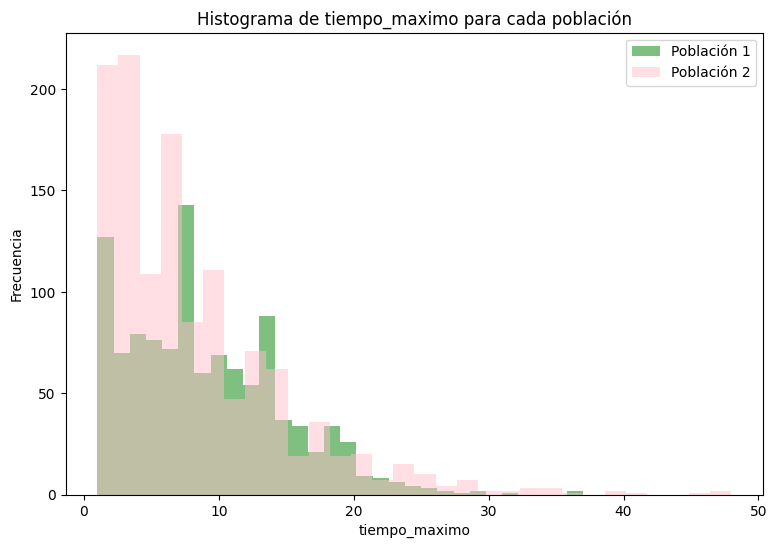

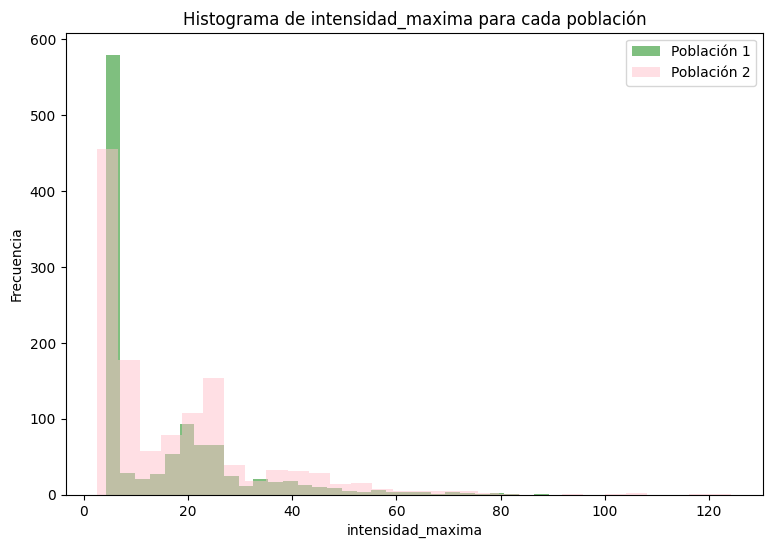

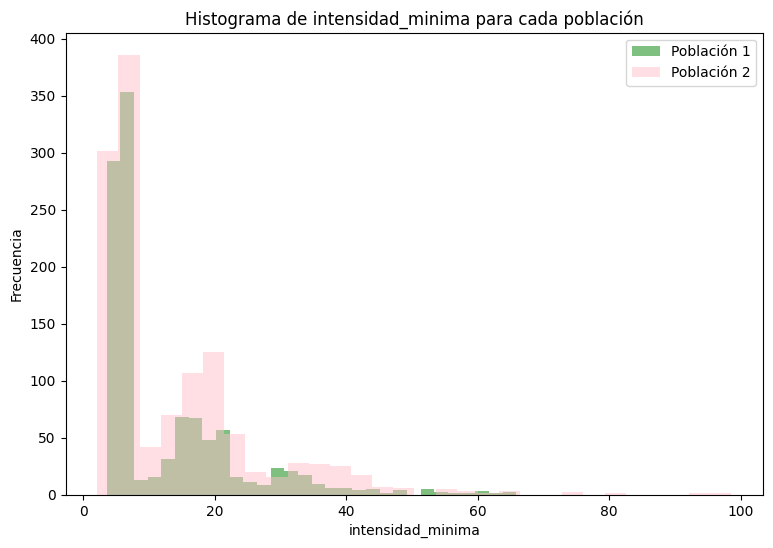

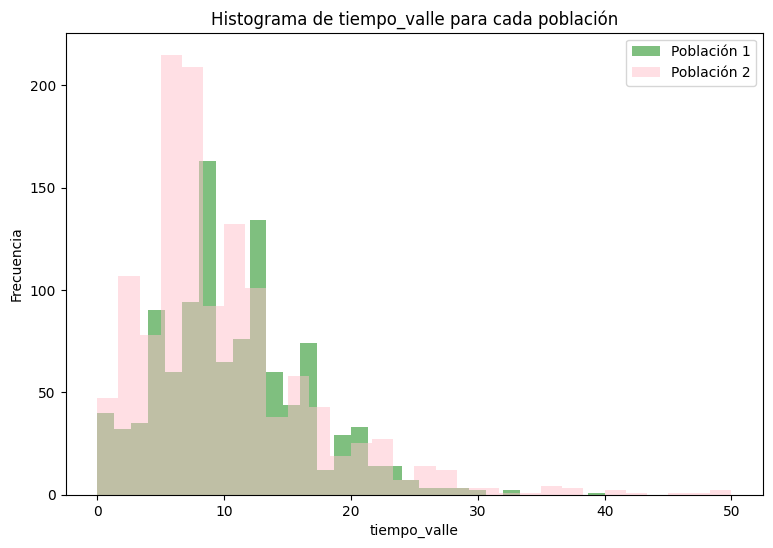

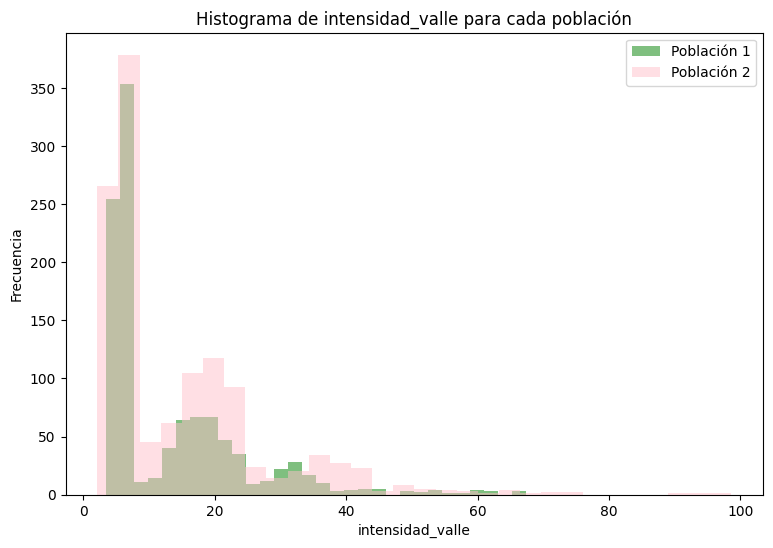

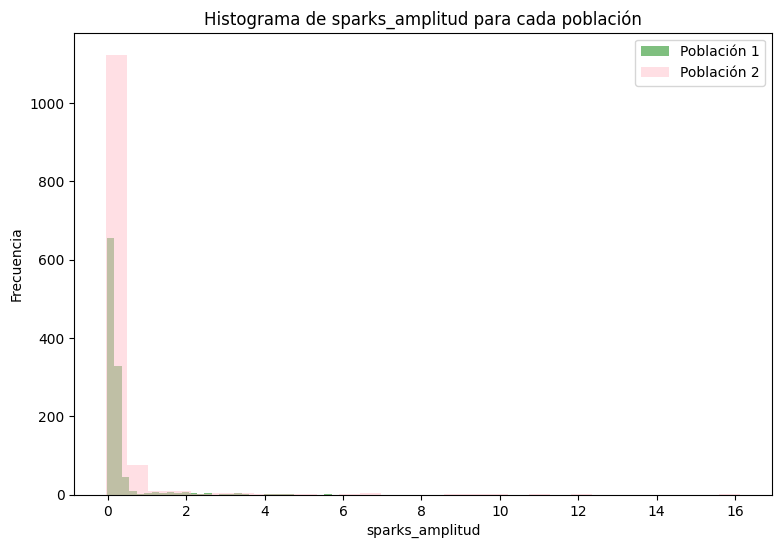

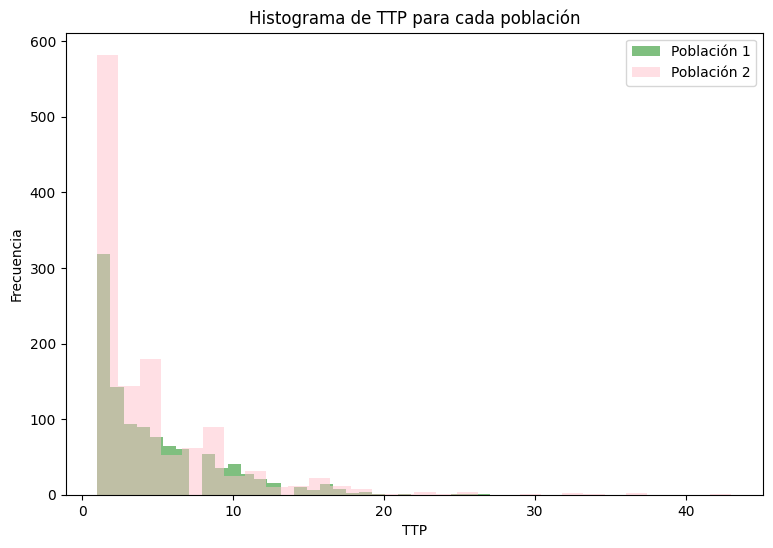

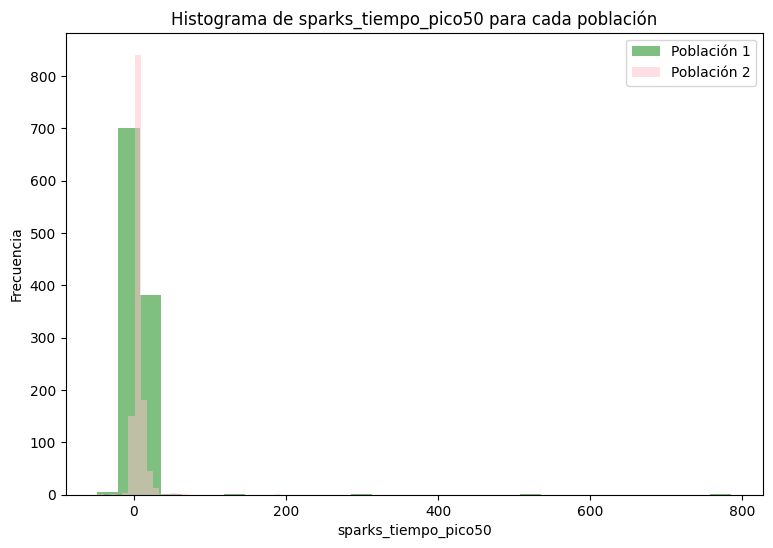

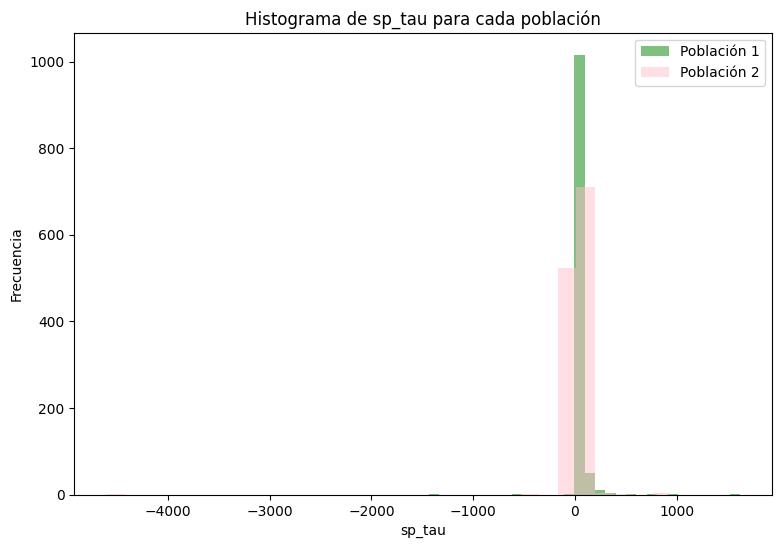

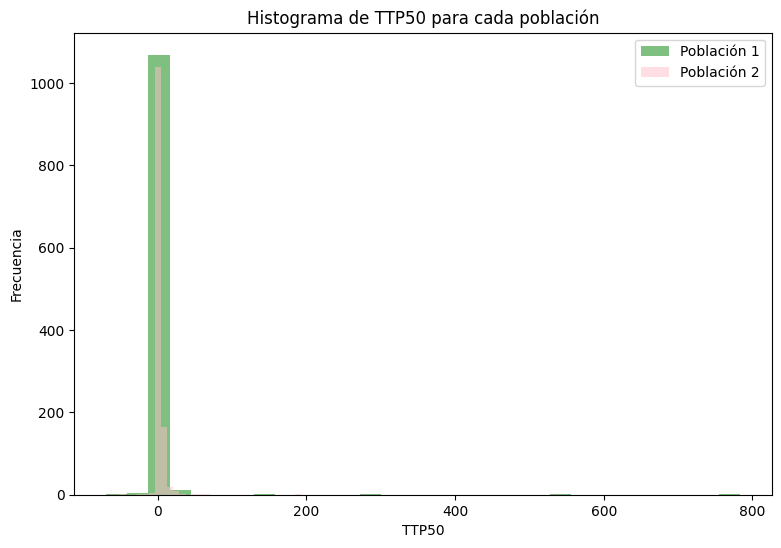

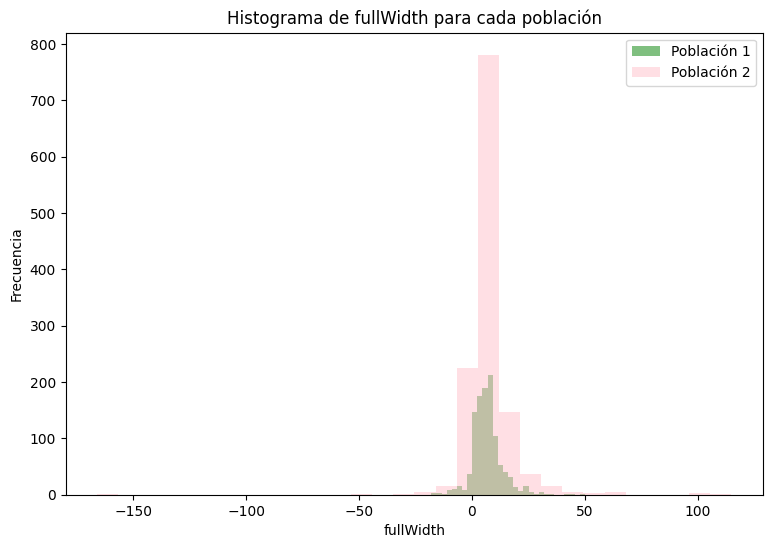

FileNotFoundError: [Errno 2] No such file or directory: '(ΔF/F0)/ΔTmax_hist.png'

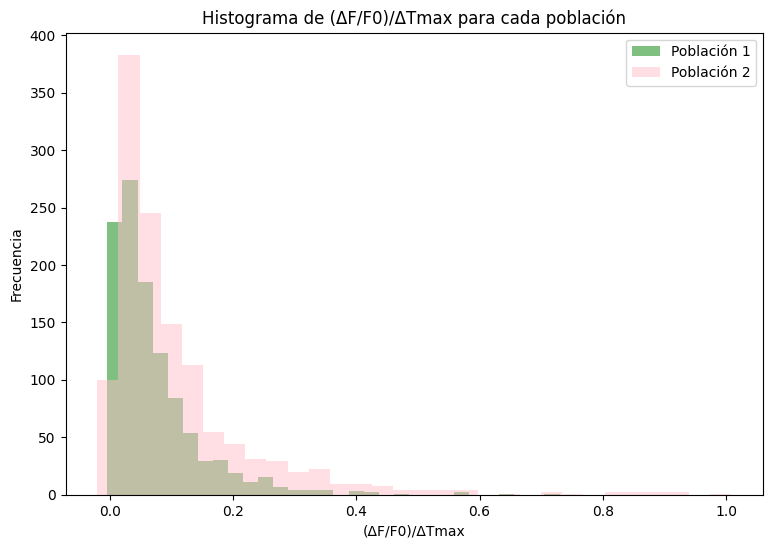

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Generar histogramas separados por población para cada columna
for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"
    
    plt.figure(figsize=(9, 6))
    plt.hist(poblacion1[columna], bins=30, alpha=0.5, label='Población 1', color='green')
    plt.hist(poblacion2[columna], bins=30, alpha=0.5, label='Población 2', color='pink')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {columna} para cada población')
    plt.legend()
    plt.savefig(f'{columna}_hist')  # Guardar imagen del histograma
    plt.show()

#df.hist(bins=30, figsize=(9,9)) #obtener histograma para ver la distribucion de cada una de las variables
#pl.suptitle("Histogram for each numeric input variable")#titulo de los graficos
#plt.savefig('fruits_hist') #para guardar imagenes de los graficos
#plt.show()#mostrar los graficos

### Calcular intervalo de confianza

In [36]:
# Calcular los intervalos de confianza para la media de cada columna
confidence_level = 0.95
confidence_intervals = {}

# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"
    #intervalo para poblacion 1
    mean1 = np.mean(poblacion1)
    n1 = len(poblacion1)
    std_error1 = np.std(poblacion1, ddof=1) / np.sqrt(n1)
    margin_of_error1 = std_error1 * stats.t.ppf((1 + confidence_level) / 2, n1 - 1)
    confidence_interval_1 = (mean1 - margin_of_error1, mean1 + margin_of_error1)


    #intervalo para poblacion 2
    mean2 = np.mean(poblacion2)
    n2 = len(poblacion2)
    std_error2 = np.std(poblacion2, ddof=1) / np.sqrt(n2)
    margin_of_error2 = std_error2 * stats.t.ppf((1 + confidence_level) / 2, n2 - 1)
    confidence_interval_2 = (mean2 - margin_of_error2, mean2 + margin_of_error2)

# Almacenar los intervalos de confianza en el diccionario
    confidence_intervals[columna] = {'Poblacion 1': confidence_interval_poblacion1,
                                     'Poblacion 2': confidence_interval_poblacion2}

# Imprimir los intervalos de confianza
for columna, intervals in confidence_intervals.items():
    print(f'Columna: {columna}')
    print(f'Poblacion 1: {intervals["Poblacion 1"]}')
    print(f'Poblacion 2: {intervals["Poblacion 2"]}')
    print()


Columna: tiempo_maximo
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: intensidad_maxima
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: intensidad_minima
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: tiempo_valle
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: intensidad_valle
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: sparks_amplitud
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: TTP
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: sparks_tiempo_pico50
Poblacion 1: (17.16773947335639, 18.160700893616088)
Pobla

### Determinar tamaño de muestra

In [44]:
import math
import pandas as pd
from statsmodels.stats.power import TTestIndPower

In [45]:
tab = pd.DataFrame(df, index=['tiempo_maximo', 'intensidad_maxima', 'intensidad_minima', 
                               'tiempo_valle', 'intensidad_valle','sparks_amplitud','TTP',
                               'sparks_tiempo_pico50','sp_tau','TTP50','fullWidth','(ΔF/F0)/ΔTmax',
                               'fullDuration','width','high','flag'])

# Definir los parámetros
nivel_confianza = 0.95
margen_error = 0.05

# Crear una instancia de la clase TTestIndPower
ttp = TTestIndPower()

# Crear una lista para almacenar los tamaños muestrales
tamanios_muestrales = []

# Recorrer las columnas del DataFrame original
for columna in tab.columns:
    # Obtener los valores de la columna y la última columna (flag)
    valores = tab[columna]
    poblacion = tab['flag']
    
    # Filtrar los valores para cada población
    poblacion_1 = valores[poblacion == 1]
    poblacion_2 = valores[poblacion == 2]
    
    # Calcular el tamaño muestral para cada población utilizando statsmodels
    tamanio_muestral_1 = ttp.solve_power(effect_size=margen_error / poblacion_1.std(),
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')
    
    tamanio_muestral_2 = ttp.solve_power(effect_size=margen_error / poblacion_2.std(),
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')

    # Redondear al número entero más cercano
    tamanio_muestral_1 = math.ceil(tamanio_muestral_1)
    tamanio_muestral_2 = math.ceil(tamanio_muestral_2)
    
    # Agregar los tamaños muestrales a la lista
    tamanios_muestrales.append({'Columna': columna, 'Población 1': tamanio_muestral_1, 'Población 2': tamanio_muestral_2})

# Convertir la lista en un DataFrame
tammues = pd.DataFrame(tamanios_muestrales)

# Imprimir el DataFrame de resultados
print(tammues)

C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, Conve

                 Columna  Población 1  Población 2
0          tiempo_maximo           10           10
1      intensidad_maxima           10           10
2      intensidad_minima           10           10
3           tiempo_valle           10           10
4       intensidad_valle           10           10
5        sparks_amplitud           10           10
6                    TTP           10           10
7   sparks_tiempo_pico50           10           10
8                 sp_tau           10           10
9                  TTP50           10           10
10             fullWidth           10           10
11         (ΔF/F0)/ΔTmax           10           10
12          fullDuration           10           10
13                 width           10           10
14                  high           10           10
15                  flag           10           10


C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


### Ensayo de hipotesis


Contrastes de hipótesis para dos o más poblaciones--> lo que me gustaria

sparks_amplitud, Intervalo de Confianza: (0.27513833727765064, 0.33951736698111895)

H0= el spark fue un error

H1= el spark es una lectura correcta

si spark_amplitud>0.27 entonces calculo medias para estos valores y planteo que cuando sea mayor H1=True

o

sparks_tiempo_al_pico_50, Intervalo de confianza (6.542237901113182, 8.294209287131823)

pero en grafico me da un valor cero para determinar dos grupos entonces

H0= los canales de Ca2+ no se al recibir el estimulo (<0)

H1= se abren los canales de Ca2+ (>0)


Contrastes de hipótesis para dos o más poblaciones--> lo que hice: estableci la poblacion por la flag determine que hiciera  la poblacion 1 la de flag 1 y poblacion 2 la de flag 2

In [52]:
### Las poblaciones no son normales asi que comparo pob1 y pob2 como tienen distinto tamaño tengo 
###que aplicar MANNWHITNEYU##

##Esta prueba es una alternativa no paramétrica al test t de Student y es adecuada para comparar dos muestras 
# independientes cuando no se cumplen los supuestos de normalidad y homogeneidad de varianzas.
#la prueba de Mann-Whitney U evalúa la hipótesis nula de que las dos poblaciones tienen distribuciones idénticas. 
# Si el valor p resultante es menor que el nivel de significancia deseado (por ejemplo, 0.05), se puede concluir 
# que hay evidencia estadística para rechazar la hipótesis nula y afirmar que hay diferencias significativas entre 
# las dos poblaciones en esa columna específica.

from scipy.stats import mannwhitneyu

# Create a list to store the results
results = []

# Iterate over each column of the DataFrame
for column in df.columns:
    # Filter the data for each population (flag 1 and flag 2)
    population1 = df[column][df['flag'] == 1]
    population2 = df[column][df['flag'] == 2]
    
    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(population1, population2)
    
    # Determine if there is a significant difference
    is_significant = p_value < 0.05
    
    # Add the results to the list
    results.append({'Column': column, 'Mann-Whitney U Statistic': statistic, 'p-value': p_value, 'Significant Difference': is_significant})

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)



                  Column  Mann-Whitney U Statistic       p-value   
0          tiempo_maximo                  771274.5  1.345702e-08  \
1      intensidad_maxima                  619086.0  2.257779e-04   
2      intensidad_minima                  655619.0  1.493234e-01   
3           tiempo_valle                  774253.5  4.563437e-09   
4       intensidad_valle                  649007.0  6.453206e-02   
5        sparks_amplitud                  553966.0  1.444666e-14   
6                    TTP                  726116.0  3.238766e-03   
7   sparks_tiempo_pico50                  759059.5  8.727759e-07   
8                 sp_tau                  782940.0  1.681549e-10   
9                  TTP50                  697209.0  2.647234e-01   
10             fullWidth                  708141.0  7.298884e-02   
11         (ΔF/F0)/ΔTmax                  554015.0  1.479101e-14   
12          fullDuration                  731832.0  1.134791e-03   
13                 width                  838190

In [46]:
##Por poblacion no me dan normal las poblaciones asi que no podria aplicat ttst###
## Contrastes de hipótesis para dos o más poblaciones

import pandas as pd
from scipy.stats import ttest_ind
# Iterar sobre cada columna y realizar el procedimiento
# Create an empty list to store the results
resultados = []

# Iterate over each column
for columna in df.columns[:-1]:  # Exclude the last column (Columna6)
    poblacion1 = df.loc[df['flag'] == 1, columna]
    poblacion2 = df.loc[df['flag'] == 2, columna]

    media_poblacion1 = poblacion1.mean()
    media_poblacion2 = poblacion2.mean()

    statistic, p_value = ttest_ind(poblacion1, poblacion2)

    resultado_columna = {'Columna': columna,
                         'Media Población 1': media_poblacion1,
                         'Media Población 2': media_poblacion2,
                         'Estadístico t': statistic,
                         'Valor p': p_value}

    resultados.append(resultado_columna)

# Convert the list of dictionaries to a DataFrame
resultados_df = pd.DataFrame(resultados)

# Print the results
print(resultados_df)

                 Columna  Media Población 1  Media Población 2  Estadístico t   
0          tiempo_maximo           9.036697           8.191011       3.251444  \
1      intensidad_maxima          15.518443          17.445885      -3.102209   
2      intensidad_minima          12.421644          13.523617      -2.305819   
3           tiempo_valle          10.581651           9.763242       3.112922   
4       intensidad_valle          13.205630          14.518183      -2.609115   
5        sparks_amplitud           0.252983           0.354868      -3.062272   
6                    TTP           4.756881           4.463884       1.561335   
7   sparks_tiempo_pico50           8.427034           6.535717       2.086644   
8                 sp_tau          35.392497          24.024503       2.275748   
9                  TTP50           4.147217           2.808590       1.496038   
10             fullWidth           6.757798           7.119583      -0.854283   
11         (ΔF/F0)/ΔTmax    

Análisis de dependencia de variables categóricas.

Esta relacionado el TTP on la amplitud del spark?

In [60]:
## INTENTO1 NO DA!
df2 = df ['TTP'] + df ['sparks_amplitud']

a = df ['TTP'] > 0,27
b = df ['sparks_amplitud'] >4.41

#sparks_amplitud, Intervalo de Confianza: (0.27513833727765064, 0.33951736698111895)
#TTP, Intervalo de Confianza: (4.419311283875328, 4.781887346261658)

#comparamos los datos en una tabla de contingencia
groups = df2.groupby([a,b]).count() 
print (groups)
#Test de comparación de datos cualitativos
print(ss.chisquare(groups, ddof=0, axis=0))

print(ss.fisher_exact(table, alternative='two-sided'))

KeyError: (0       True
1       True
2       True
3       True
4       True
        ... 
2392    True
2393    True
2394    True
2395    True
2396    True
Name: TTP, Length: 2336, dtype: bool, 27)

In [59]:
##INTENTO 2: TAMPOCO DA! es el de chi pero no me da!
#sparks_amplitud, Intervalo de Confianza: (0.27513833727765064, 0.33951736698111895)
#TTP, Intervalo de Confianza: (4.419311283875328, 4.781887346261658)
## Análisis de dependencia de variables categóricas

import pandas as pd
import scipy.stats as ss

# Create the conditions using correct comparison operators
a = (df['TTP'] > 0.27) & (df['TTP'] < 0.33)
b = (df['sparks_amplitud'] > 4.41) & (df['sparks_amplitud'] < 4.79)

# Create a contingency table using groupby
contingency_table = df.groupby([a, b])['flag'].count().unstack(fill_value=0) #se supone que  con unstack me deberia dar una tabla de 2*2

# Perform the chi-square test
chi2, p_value, _, _ = ss.chi2_contingency(contingency_table)

# Print the chi-square test results
print("Chi-Square Test Results:")
print(f"Chi2: {chi2}")
print(f"p-value: {p_value}")

# Perform the Fisher's exact test
odds_ratio, fisher_p_value = ss.fisher_exact(contingency_table)

# Print the Fisher's exact test results
print("Fisher's Exact Test Results:")
print(f"Odds Ratio: {odds_ratio}")
print(f"p-value: {fisher_p_value}")



Chi-Square Test Results:
Chi2: 0.0
p-value: 1.0


ValueError: The input `table` must be of shape (2, 2).

In [58]:
## INTENTO 3: tampoco me da
import pandas as pd
import scipy.stats as ss

# Create the conditions using correct comparison operators
a = (df['TTP'] > 0.27) & (df['TTP'] < 0.33)
b = (df['sparks_amplitud'] > 4.41) & (df['sparks_amplitud'] < 4.79)

# Create separate contingency tables for each combination of categories in a and b
contingency_tables = []
for a_category in a.unique():
    for b_category in b.unique():
        contingency_table = pd.crosstab(a[a == a_category], b[b == b_category])
        contingency_tables.append(contingency_table)

# Perform the chi-square test and Fisher's exact test for each contingency table
for i, table in enumerate(contingency_tables):
    if table.shape == (2, 2):
        print(f"Contingency Table {i+1}:")
        print(table)

        # Perform the chi-square test
        chi2, p_value = ss.chisquare(table)
        print("Chi-Square Test Results:")
        print(f"Chi2: {chi2}")
        print(f"p-value: {p_value}")

        # Perform the Fisher's exact test
        odds_ratio, fisher_p_value = ss.fisher_exact(table)
        print("Fisher's Exact Test Results:")
        print(f"Odds Ratio: {odds_ratio}")
        print(f"p-value: {fisher_p_value}")
        print()
    else:
        print(f"Contingency Table {i+1} does not have the shape (2, 2).")


Contingency Table 1 does not have the shape (2, 2).
Contingency Table 2 does not have the shape (2, 2).


In [61]:
### ESTE NO POR QUE NO USO GROUP BY: pero si da###

from scipy.stats import chi2_contingency

# Crear la tabla de contingencia
contingency_table = pd.crosstab(df['TTP'], df['sparks_amplitud'])

# Realizar el test de chi-cuadrado de independencia
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Imprimir los resultados
print("Tabla de Contingencia:")
print(contingency_table)
print("\nTest de Chi-cuadrado:")
print(f"Estadístico de Chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")

Tabla de Contingencia:
sparks_amplitud  -0.040698   -0.028846   -0.013699   -0.012195   -0.009615    
TTP                                                                           
1.0                       0           0           0           0           0  \
2.0                       1           0           0           0           0   
3.0                       0           0           0           1           0   
4.0                       0           0           0           0           0   
5.0                       0           0           0           0           0   
6.0                       0           0           0           0           0   
7.0                       0           0           0           0           0   
8.0                       0           0           0           0           0   
9.0                       0           0           0           0           0   
10.0                      0           0           1           0           0   
11.0                      0  

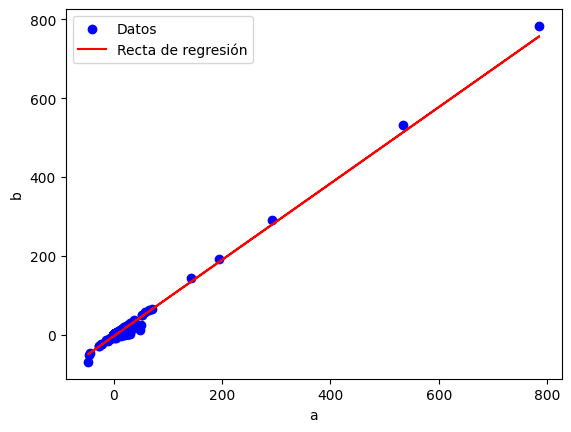

P-value: 0.0
Coeficiente de correlación: 0.9812800712143532


In [49]:
##Evaluar el ajuste de una recta de regresión e interpretar el coeficiente de correlación.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


a = df['sparks_tiempo_pico50'].values
b = df['TTP50'].values
slope, intercept, r_value, p_value, std_err = linregress(a, b)

plt.scatter(a, b, color='blue', label='Datos')
plt.plot(a, slope*a + intercept, color='red', label='Recta de regresión')
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.show()
# Imprimir el p-value y el coeficiente de correlación
print("P-value:", p_value)
print("Coeficiente de correlación:", r_value)



In [ ]:

El coeficiente de correlación r_value varía entre -1 y 1. 
Un valor cercano a 1 indica una correlación positiva fuerte, mientras que un 
valor cercano a -1 indica una correlación negativa fuerte. Un valor cercano a
 0 indica una correlación débil o nula.

